In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import folium
from folium import plugins 
from folium.plugins import HeatMap
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
! pip install telethon

In [2]:
import pandas as pd
from telethon.sync import TelegramClient

name = 'anon' 
api_id = input()
api_hash = input() 
chat = 't.me/elonmusktwitter'

data = [] 

async with TelegramClient(name, api_id, api_hash) as client:
    async for message in client.iter_messages(chat):
        data.append([message.sender_id, message.text, message.date])


df = pd.DataFrame(data, columns=['SENDER', 'MESSAGE', 'DATE'])




21088441
363fb560d49fd12efb110306a525fecd


In [3]:
df.head()

,SENDER,MESSAGE,DATE
0,-1001153434921,@PeterDiamandis Write it on Twitter! Our algor...,2023-05-23 16:31:36+00:00
1,-1001153434921,@Kristennetten It’s pretty wild in the Notes w...,2023-05-23 16:31:35+00:00
2,-1001153434921,@levelsio Good idea — Elon Musk (@elonmusk) [M...,2023-05-23 14:30:43+00:00
3,-1001153434921,@Gfilche @neuralink Human output data rate is ...,2023-05-23 00:28:31+00:00
4,-1001153434921,@AviSchiffmann Neuralink — Elon Musk (@elonmus...,2023-05-23 00:28:30+00:00


In [4]:
df['DATE'] = df['DATE'].dt.floor('H')

In [5]:
df.head()

,SENDER,MESSAGE,DATE
0,-1001153434921,@PeterDiamandis Write it on Twitter! Our algor...,2023-05-23 16:00:00+00:00
1,-1001153434921,@Kristennetten It’s pretty wild in the Notes w...,2023-05-23 16:00:00+00:00
2,-1001153434921,@levelsio Good idea — Elon Musk (@elonmusk) [M...,2023-05-23 14:00:00+00:00
3,-1001153434921,@Gfilche @neuralink Human output data rate is ...,2023-05-23 00:00:00+00:00
4,-1001153434921,@AviSchiffmann Neuralink — Elon Musk (@elonmus...,2023-05-23 00:00:00+00:00


In [6]:
df['DATE'] = df['DATE'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [7]:
df.head(50)

,SENDER,MESSAGE,DATE
0,-1001153434921,@PeterDiamandis Write it on Twitter! Our algor...,2023-05-23 16:00:00
1,-1001153434921,@Kristennetten It’s pretty wild in the Notes w...,2023-05-23 16:00:00
2,-1001153434921,@levelsio Good idea — Elon Musk (@elonmusk) [M...,2023-05-23 14:00:00
3,-1001153434921,@Gfilche @neuralink Human output data rate is ...,2023-05-23 00:00:00
4,-1001153434921,@AviSchiffmann Neuralink — Elon Musk (@elonmus...,2023-05-23 00:00:00
5,-1001153434921,@GavinSBaker Good — Elon Musk (@elonmusk) [May...,2023-05-22 22:00:00
6,-1001153434921,@JosephJacks_ 🎯 — Elon Musk (@elonmusk) [May 2...,2023-05-22 22:00:00
7,-1001153434921,@ianzelbo Layers of irony — Elon Musk (@elonmu...,2023-05-22 20:00:00
8,-1001153434921,RT @ehikian: fwiw you can post thirst pics on ...,2023-05-22 20:00:00
9,-1001153434921,@ehikian @NoemiKhachian 🤣 — Elon Musk (@elonmu...,2023-05-22 20:00:00


In [8]:
df['MESSAGE'].fillna('', inplace=True)

In [9]:
keywords = ['Bitcoin', 'BTC', 'Crypto', 'Cryptocurrency', 'Dogecoin', 'Bit coin', 'Cryptomarket']

filtered_dataset = df[df['MESSAGE'].str.contains('|'.join(keywords), case=False)]

In [10]:
filtered_dataset.head(1000)

,SENDER,MESSAGE,DATE
1080,-1001153434921,"@DogecoinNorway Or, at least, that’s what Snor...",2023-04-23 14:00:00
1139,-1001153434921,@carlabitcoin Beautiful— Elon Musk (@elonmusk)...,2023-04-22 05:00:00
1494,-1001153434921,"@crypto_birb 💯— Elon Musk (@elonmusk) [Apr 14,...",2023-04-14 07:00:00
1586,-1001153434921,@cb_doge @dvorahfr I will pay a million Dogeco...,2023-04-12 22:00:00
1665,-1001153434921,@LordTJCrypto Nice— Elon Musk (@elonmusk) [Apr...,2023-04-10 21:00:00
...,...,...,...
19118,-1001153434921,Dogecoin value may vary [https://t.co/UWerAhPv...,2019-04-02 20:00:00
19120,-1001153434921,Dogecoin rulz [pic.twitter.com/flWWUgAgLU](htt...,2019-04-02 20:00:00
19122,-1001153434921,Dogecoin might be my fav cryptocurrency. It’s ...,2019-04-02 09:00:00
19552,-1001153434921,Whoever owns the early BTC deserves a Nobel pr...,2019-02-21 10:00:00


In [11]:
earliest_date = filtered_dataset["DATE"].min()
print(earliest_date)

2019-02-21 10:00:00


In [12]:

# Get the bitcoin hourly from here
# https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd?select=BTC-Hourly.csv

btc_dataset = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence-main/BTC-Hourly.csv")

In [13]:
btc_dataset.drop('high', axis=1, inplace=True)
btc_dataset.drop('low', axis=1, inplace=True)
btc_dataset.drop('symbol', axis=1, inplace=True)
btc_dataset.drop('Volume BTC', axis=1, inplace=True)
btc_dataset.drop('Volume USD', axis=1, inplace=True)

In [14]:
btc_dataset.head()

,unix,date,open,close
0,1646092800,2022-03-01 00:00:00,43221.71,43312.27
1,1646089200,2022-02-28 23:00:00,43085.30,43178.98
2,1646085600,2022-02-28 22:00:00,41657.23,42907.32
3,1646082000,2022-02-28 21:00:00,41917.09,41659.53
4,1646078400,2022-02-28 20:00:00,41361.99,41914.97


In [15]:
filtered_dataset.head(500)

,SENDER,MESSAGE,DATE
1080,-1001153434921,"@DogecoinNorway Or, at least, that’s what Snor...",2023-04-23 14:00:00
1139,-1001153434921,@carlabitcoin Beautiful— Elon Musk (@elonmusk)...,2023-04-22 05:00:00
1494,-1001153434921,"@crypto_birb 💯— Elon Musk (@elonmusk) [Apr 14,...",2023-04-14 07:00:00
1586,-1001153434921,@cb_doge @dvorahfr I will pay a million Dogeco...,2023-04-12 22:00:00
1665,-1001153434921,@LordTJCrypto Nice— Elon Musk (@elonmusk) [Apr...,2023-04-10 21:00:00
...,...,...,...
19118,-1001153434921,Dogecoin value may vary [https://t.co/UWerAhPv...,2019-04-02 20:00:00
19120,-1001153434921,Dogecoin rulz [pic.twitter.com/flWWUgAgLU](htt...,2019-04-02 20:00:00
19122,-1001153434921,Dogecoin might be my fav cryptocurrency. It’s ...,2019-04-02 09:00:00
19552,-1001153434921,Whoever owns the early BTC deserves a Nobel pr...,2019-02-21 10:00:00


In [25]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 12.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/var/folders/49/1bqwbw2539j4jwl3zcbb_hb00000gn/T/ipykernel_74219/2526341167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.rename(columns={'DATE': 'DATE'}, inplace=True)


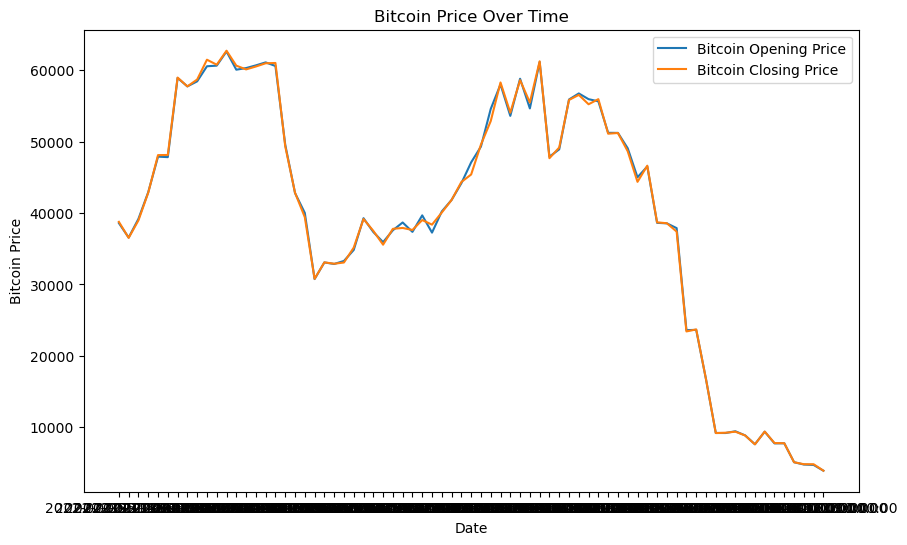

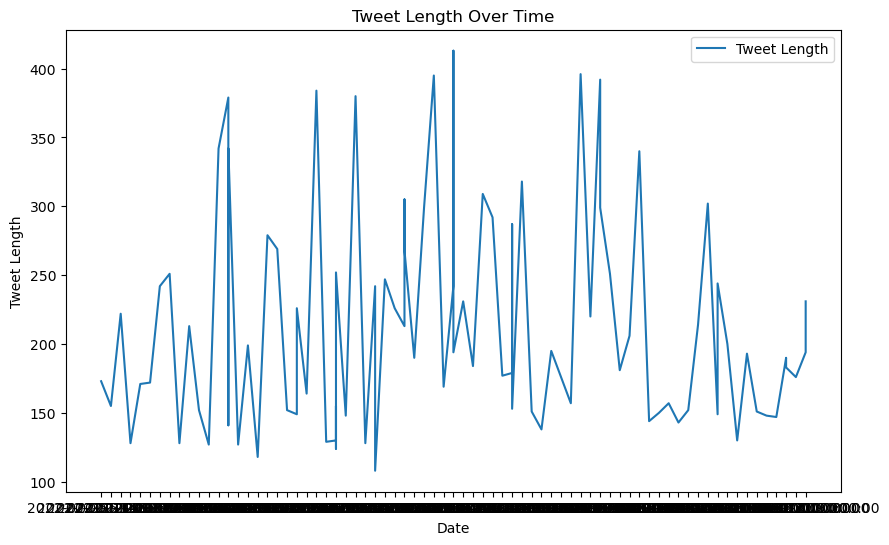

Pearson's correlation between tweet length and Bitcoin opening price: 0.18964336090028674


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


btc_dataset.rename(columns={'date': 'DATE'}, inplace=True)
filtered_dataset.rename(columns={'DATE': 'DATE'}, inplace=True)


merged_data = pd.merge(btc_dataset, filtered_dataset, on='DATE')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['DATE'], merged_data['open'], label='Bitcoin Opening Price')
plt.plot(merged_data['DATE'], merged_data['close'], label='Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['DATE'], merged_data['MESSAGE'].str.len(), label='Tweet Length')
plt.xlabel('Date')
plt.ylabel('Tweet Length')
plt.title('Tweet Length Over Time')
plt.legend()
plt.show()


correlation, _ = pearsonr(merged_data['MESSAGE'].str.len(), merged_data['open'])
print(f"Pearson's correlation between tweet length and Bitcoin opening price: {correlation}")


In [63]:
merged_data.head()

,unix,DATE,open,close,SENDER,MESSAGE
0,1645786800,2022-02-25 11:00:00,38597.74,38771.98,-1001153434921,@CryptoWhale @Gfilche Protagonists created ove...
1,1643115600,2022-01-25 13:00:00,36568.54,36525.77,-1001153434921,I will eat a happy meal on tv if @McDonalds ac...
2,1642755600,2022-01-21 09:00:00,39195.44,38981.90,-1001153434921,Twitter is spending engineering resources on t...
3,1642140000,2022-01-14 06:00:00,42925.85,42861.10,-1001153434921,Tesla merch buyable with Dogecoin— Elon Musk (...
4,1639688400,2021-12-16 21:00:00,47907.99,48124.71,-1001153434921,@BTC_Archive @SenSanders Is there anything mor...
